# Case Study - Lending Loan                                  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;        Group ID: 74994


## Aim
* Identify the risky loan applicants that cause the credit loss to the company, using EDA.
* The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

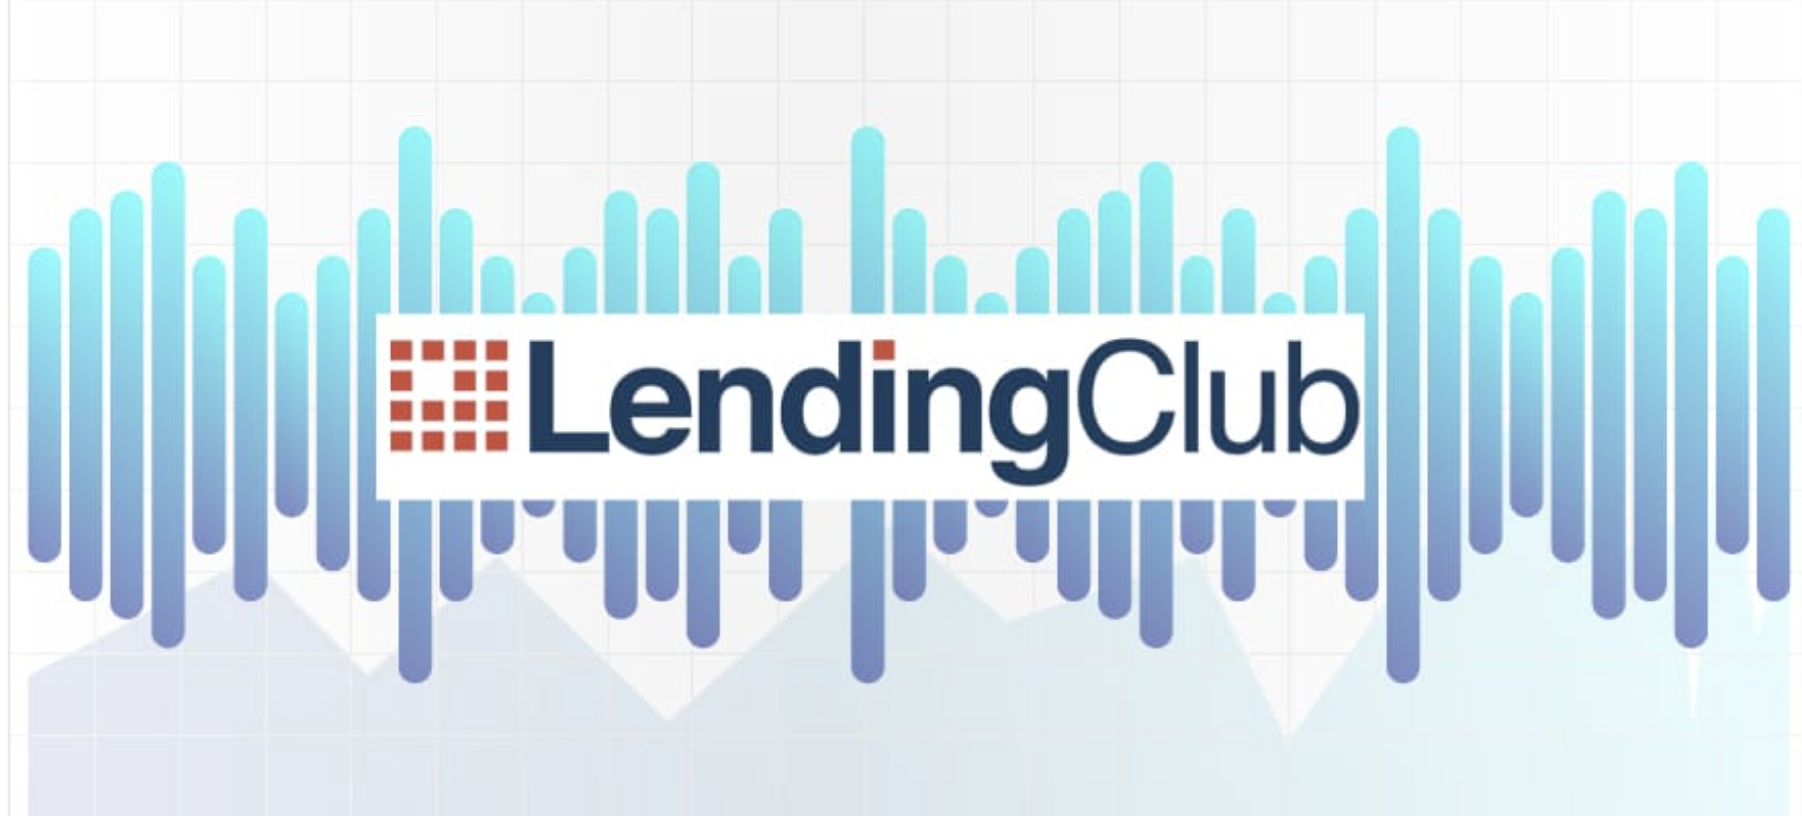

## Data Understanding
#### Using EDA techniques following steps are being performed on the data supplied

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

# work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
from collections import Counter # To do counter of some features
import plotly.express as px

In [2]:
data = pd.read_csv('loan.csv')
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [3]:
data.shape

(39717, 111)

In [4]:
data.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

In [5]:
data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [6]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

## Data Cleaning

##### Please note: The histogram plots take some time to get plotted. Please be paitient.

#### Check for duplicate rows in dataset based on id column

In [7]:
# Check for duplicate rows in dataset based on id column
print(data.duplicated(subset=None, keep='first').count())
duplicate_rows=data[data.duplicated(['id'])]
duplicate_rows
#Below output shows no duplicate rows

39717


Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m, acc_open_past_24mths, avg_cur_bal, bc_open_to_buy, bc_util, chargeoff_within_12_mths, delinq_amnt, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mort_acc, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq, mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_bc_tl, num_il_tl, num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, ...]
Index: []

[0 rows x 111 columns]

### EDA: Treating Missing Values

#### Checking for null columns

In [8]:
#Need to fix missing values
missing_values = data.isnull().sum()
missing_values

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [9]:
total_missing = pd.DataFrame({'column_name': data.columns,'missing_values': missing_values})
missing_columns = total_missing[(total_missing['missing_values'] == 39717)].column_name
(total_missing['missing_values'] == 39717).sum()

54

In [10]:
#The above have all N/A-->These wouldnt serve much purpose, So dropping them
df_post_null_drops = data.drop(missing_columns, axis=1)
df_post_null_drops

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... next_pymnt_d  \
0       36 months   10.65%       162.87     B        B2  ...          NaN   
1       60 months   15.27%        59.83     C        C4  ...          NaN   
2       36 months   15.96%        84.33     C        C5  ...          NaN   
3       36 months   13.49%       339.31     C        C1  ...          NaN   
4       60 months   12.69%        67.79     B        B5  ...       Jun-16   
...           ...      ...          ...   ...       ...  ...          ...   
39712   36 months    8.07%        78.42     A        A4  ...          NaN   
39713   36 months   10.28%       275.38     C        C1  ...          NaN   
39714   36 months    8.07%       156.84     A        A4  ...          NaN   
39715   36 months    7.43%       155.38     A        A2  ...          NaN   
39716   36 months   13.75%       255.43     E        E2  ...          NaN   

      last_credit_pull_d collections_12_mths_ex_med  policy_code  \
0                 May-16                        0.0            1   
1                 Sep-13                        0.0            1   
2                 May-16                        0.0            1   
3                 Apr-16                        0.0            1   
4                 May-16                        0.0            1   
...                  ...                        ...          ...   
39712             Jun-10                        NaN            1   
39713             Jul-10                        NaN            1   
39714             Jun-07                        NaN            1   
39715             Jun-07                        NaN            1   
39716             Jun-10                        NaN            1   

      application_type acc_now_delinq chargeoff_within_12_mths delinq_amnt  \
0           INDIVIDUAL              0                      0.0           0   
1           INDIVIDUAL              0                      0.0           0   
2           INDIVIDUAL              0                      0.0           0   
3           INDIVIDUAL              0                      0.0           0   
4           INDIVIDUAL              0                      0.0           0   
...                ...            ...                      ...         ...   
39712       INDIVIDUAL              0                      NaN           0   
39713       INDIVIDUAL              0                      NaN           0   
39714       INDIVIDUAL              0                      NaN           0   
39715       INDIVIDUAL              0                      NaN           0   
39716       INDIVIDUAL              0                      NaN           0   

      pub_rec_bankruptcies tax_liens  
0                      0.0       0.0  
1                      0.0       0.0  
2                      0.0       0.0  
3                      0.0       0.0  
4                      0.0       0.0  
...                    ...       ...  
39712                  NaN       NaN  
39713                  NaN       NaN  
39714                  NaN       NaN  
39715                  NaN       NaN  
39716                  NaN       NaN  

[39717 rows x 57 column

In [11]:
#Also there are some fields that have all same values, which will not make any difference in analysis:
#delinq_amnt, acc_now_delinq, chargeoff_within_12_mths, tax_liens, collections_12_mths_ex_med
#pymnt_plan(all n), initial_list_status(all f), policy_code(all 1), application_type(all individual),
#Removing Customer behavioural variables as well
columns_dropped_data1 = df_post_null_drops.drop(['delinq_amnt', 'acc_now_delinq', 'application_type', 'policy_code', 'pymnt_plan', 'initial_list_status', 'chargeoff_within_12_mths', 'tax_liens', 'collections_12_mths_ex_med','pub_rec_bankruptcies','revol_bal','revol_util','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','earliest_cr_line', 'delinq_2yrs','open_acc','pub_rec','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee'],axis=1)
columns_dropped_data1

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   
1       60 months   15.27%        59.83     C        C4  ...   
2       36 months   15.96%        84.33     C        C5  ...   
3       36 months   13.49%       339.31     C        C1  ...   
4       60 months   12.69%        67.79     B        B5  ...   
...           ...      ...          ...   ...       ...  ...   
39712   36 months    8.07%        78.42     A        A4  ...   
39713   36 months   10.28%       275.38     C        C1  ...   
39714   36 months    8.07%       156.84     A        A4  ...   
39715   36 months    7.43%       155.38     A        A2  ...   
39716   36 months   13.75%       255.43     E        E2  ...   

                                                    desc             purpose  \
0        Borrower added on 12/22/11 > I need to upgra...         credit_card   
1        Borrower added on 12/22/11 > I plan to use t...                 car   
2                                                    NaN      small_business   
3        Borrower added on 12/21/11 > to pay for prop...               other   
4        Borrower added on 12/21/11 > I plan on combi...               other   
...                                                  ...                 ...   
39712  Our current gutter system on our home is old a...    home_improvement   
39713  The rate of interest and fees incurred by carr...         credit_card   
39714                                                NaN  debt_consolidation   
39715                                                NaN               other   
39716  I plan to consolidate over $7,000 of debt: a c...  debt_consolidation   

                           title  zip_code addr_state    dti inq_last_6mths  \
0                       Computer     860xx         AZ  27.65              1   
1                           bike     309xx         GA   1.00              5   
2           real estate business     606xx         IL   8.72              2   
3                       personel     917xx         CA  20.00              1   
4                       Personal     972xx         OR  17.94              0   
...                          ...       ...        ...    ...            ...   
39712           Home Improvement     802xx         CO  11.33              0   
39713  Retiring credit card debt     274xx         NC   6.40              1   
39714     MBA Loan Consolidation     017xx         MA   2.30              0   
39715                   JAL Loan     208xx         MD   3.72              0   
39716         Consolidation Loan     027xx         MA  14.29              0   

      mths_since_last_delinq mths_since_last_record next_pymnt_d  
0                        NaN                    NaN          NaN  
1                        NaN                    NaN          NaN  
2                        NaN                    NaN          NaN  
3                       35.0                    NaN          NaN  
4                       38.0                    NaN       Jun-16  
...                      ...                    ...          ...  
39712                  

In [12]:
#Now lets see if there are any other columns that we wont require:
#remaining columns info
print(columns_dropped_data1.info(max_cols=100))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39717 non-null  int64  
 1   member_id               39717 non-null  int64  
 2   loan_amnt               39717 non-null  int64  
 3   funded_amnt             39717 non-null  int64  
 4   funded_amnt_inv         39717 non-null  float64
 5   term                    39717 non-null  object 
 6   int_rate                39717 non-null  object 
 7   installment             39717 non-null  float64
 8   grade                   39717 non-null  object 
 9   sub_grade               39717 non-null  object 
 10  emp_title               37258 non-null  object 
 11  emp_length              38642 non-null  object 
 12  home_ownership          39717 non-null  object 
 13  annual_inc              39717 non-null  float64
 14  verification_status     39717 non-null

#### Checking for null rows

In [13]:
missing_rows = columns_dropped_data1.isnull().sum()
missing_rows

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
url                           0
desc                      12940
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
inq_last_6mths                0
mths_since_last_delinq    25682
mths_since_last_record    36931
next_pymnt_d              38577
dtype: int64

In [14]:
#The below have close to 50% data as null, lets remove them
#desc, mths_since_last_delinq, mths_since_last_record, next_pymnt_d

columns_dropped_data2 = columns_dropped_data1.drop(['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'],axis=1)
columns_dropped_data2

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   
1       60 months   15.27%        59.83     C        C4  ...   
2       36 months   15.96%        84.33     C        C5  ...   
3       36 months   13.49%       339.31     C        C1  ...   
4       60 months   12.69%        67.79     B        B5  ...   
...           ...      ...          ...   ...       ...  ...   
39712   36 months    8.07%        78.42     A        A4  ...   
39713   36 months   10.28%       275.38     C        C1  ...   
39714   36 months    8.07%       156.84     A        A4  ...   
39715   36 months    7.43%       155.38     A        A2  ...   
39716   36 months   13.75%       255.43     E        E2  ...   

      verification_status issue_d  loan_status  \
0                Verified  Dec-11   Fully Paid   
1         Source Verified  Dec-11  Charged Off   
2            Not Verified  Dec-11   Fully Paid   
3         Source Verified  Dec-11   Fully Paid   
4         Source Verified  Dec-11      Current   
...                   ...     ...          ...   
39712        Not Verified  Jul-07   Fully Paid   
39713        Not Verified  Jul-07   Fully Paid   
39714        Not Verified  Jul-07   Fully Paid   
39715        Not Verified  Jul-07   Fully Paid   
39716        Not Verified  Jun-07   Fully Paid   

                                                     url             purpose  \
0      https://lendingclub.com/browse/loanDetail.acti...         credit_card   
1      https://lendingclub.com/browse/loanDetail.acti...                 car   
2      https://lendingclub.com/browse/loanDetail.acti...      small_business   
3      https://lendingclub.com/browse/loanDetail.acti...               other   
4      https://lendingclub.com/browse/loanDetail.acti...               other   
...                                                  ...                 ...   
39712  https://lendingclub.com/browse/loanDetail.acti...    home_improvement   
39713  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
39714  https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
39715  https://lendingclub.com/browse/loanDetail.acti...               other   
39716  https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   

                           title zip_code addr_state    dti inq_last_6mths  
0                       Computer    860xx         AZ  27.65              1  
1                           bike    309xx         GA   1.00              5  
2           real estate business    606xx         IL   8.72              2  
3                       personel    917xx         CA  20.00              1  
4                       Personal    972xx         OR  17.94              0  
...                          ...      ...        ...    ...            ...  
39712           Home Improvement    802xx         CO  11.33              0  
39713  Retiring credit card debt    274xx         NC   6.40              1  
39714     MBA Loan Consolidation    017xx         MA   2.30              0  
39715                   JAL Loan    208xx         MD   3.72           

In [15]:
columns_dropped_data2.isnull().sum()

id                        0
member_id                 0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_title              2459
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
url                       0
purpose                   0
title                    11
zip_code                  0
addr_state                0
dti                       0
inq_last_6mths            0
dtype: int64

In [16]:
# Printing the count of rows having null values
print(columns_dropped_data2.emp_title.isnull().sum())
print(columns_dropped_data2.emp_length.isnull().sum())
columns_dropped_data2.shape

2459
1075


(39717, 24)

In [17]:
#emp_title has the next highest number of missing values.It has information about the customer/borrower like their job title, this can't be imputed. lets remove the missing rows:
columns_dropped_data2=columns_dropped_data2[~columns_dropped_data2['emp_title'].isnull()]
columns_dropped_data2.shape

(37258, 24)

In [18]:
#Similary emp_length has the next highest number of missing values, has details on employment length in years. lets remove the missing rows:
columns_dropped_data2=columns_dropped_data2[~columns_dropped_data2['emp_length'].isnull()]
columns_dropped_data2.shape

(37202, 24)

In [19]:
#now no null/missing rows:
columns_dropped_data2.isnull().sum()

id                     0
member_id              0
loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
url                    0
purpose                0
title                  9
zip_code               0
addr_state             0
dti                    0
inq_last_6mths         0
dtype: int64

#### There are a few columns having all unique values, therefore, dropping those as they do not add value to the analysis

In [20]:
columns_dropped_data3 = columns_dropped_data2.drop(['member_id' ,'url','zip_code','title'],axis=1)
columns_dropped_data3.shape

(37202, 20)

In [21]:
columns_dropped_data3.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
1  1077430       2500         2500           2500.0   60 months   15.27%   
3  1076863      10000        10000          10000.0   36 months   13.49%   
4  1075358       3000         3000           3000.0   60 months   12.69%   
5  1075269       5000         5000           5000.0   36 months    7.90%   
6  1069639       7000         7000           7000.0   60 months   15.96%   

   installment grade sub_grade                  emp_title emp_length  \
1        59.83     C        C4                      Ryder   < 1 year   
3       339.31     C        C1        AIR RESOURCES BOARD  10+ years   
4        67.79     B        B5   University Medical Group     1 year   
5       156.46     A        A4       Veolia Transportaton    3 years   
6       170.08     C        C5  Southern Star Photography    8 years   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   
5           RENT     36000.0     Source Verified  Dec-11   Fully Paid   
6           RENT     47004.0        Not Verified  Dec-11   Fully Paid   

              purpose addr_state    dti  inq_last_6mths  
1                 car         GA   1.00               5  
3               other         CA  20.00               1  
4               other         OR  17.94               0  
5             wedding         AZ  11.20               3  
6  debt_consolidation         NC  23.51               1

In [22]:
columns_dropped_data3.dtypes

id                       int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_title               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
addr_state              object
dti                    float64
inq_last_6mths           int64
dtype: object

In [23]:
columns_dropped_data3.shape

(37202, 20)

### EDA: Standarizing the data with different units of measurements

In [24]:
# Removing % from the int_rate column & converting the datatype
columns_dropped_data3['int_rate'] =columns_dropped_data3['int_rate'].str.rstrip('%')
columns_dropped_data3['int_rate'] =columns_dropped_data3['int_rate'].astype(float)
columns_dropped_data3['int_rate']

1        15.27
3        13.49
4        12.69
5         7.90
6        15.96
         ...  
39710     7.43
39711     8.70
39712     8.07
39713    10.28
39716    13.75
Name: int_rate, Length: 37202, dtype: float64

### EDA: (Derived Metrics) Deriving the Column from date into month & year

In [25]:
#issue_d
columns_dropped_data3['issue_d'] = pd.to_datetime(columns_dropped_data3['issue_d'], format='%b-%y')
columns_dropped_data3['issue_d_year']=columns_dropped_data3['issue_d'].dt.year
columns_dropped_data3['issue_d_month']=columns_dropped_data3['issue_d'].dt.month
columns_dropped_data3.head()
#two new columns will be added

id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
1  1077430       2500         2500           2500.0   60 months     15.27   
3  1076863      10000        10000          10000.0   36 months     13.49   
4  1075358       3000         3000           3000.0   60 months     12.69   
5  1075269       5000         5000           5000.0   36 months      7.90   
6  1069639       7000         7000           7000.0   60 months     15.96   

   installment grade sub_grade                  emp_title  ... annual_inc  \
1        59.83     C        C4                      Ryder  ...    30000.0   
3       339.31     C        C1        AIR RESOURCES BOARD  ...    49200.0   
4        67.79     B        B5   University Medical Group  ...    80000.0   
5       156.46     A        A4       Veolia Transportaton  ...    36000.0   
6       170.08     C        C5  Southern Star Photography  ...    47004.0   

  verification_status    issue_d  loan_status             purpose addr_state  \
1     Source Verified 2011-12-01  Charged Off                 car         GA   
3     Source Verified 2011-12-01   Fully Paid               other         CA   
4     Source Verified 2011-12-01      Current               other         OR   
5     Source Verified 2011-12-01   Fully Paid             wedding         AZ   
6        Not Verified 2011-12-01   Fully Paid  debt_consolidation         NC   

     dti inq_last_6mths  issue_d_year  issue_d_month  
1   1.00              5          2011             12  
3  20.00              1          2011             12  
4  17.94              0          2011             12  
5  11.20              3          2011             12  
6  23.51              1          2011             12  

[5 rows x 22 columns]

In [26]:
columns_dropped_data3.dtypes

id                              int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                datetime64[ns]
loan_status                    object
purpose                        object
addr_state                     object
dti                           float64
inq_last_6mths                  int64
issue_d_year                    int64
issue_d_month                   int64
dtype: object

In [27]:
## Removing all the records whose loan_status = Current as they will not any value add for the analysis as they are ongoing transactions
df_data = columns_dropped_data3[columns_dropped_data3['loan_status'] != 'Current']

In [28]:
df_data[df_data['loan_status'] == 'Current']

Empty DataFrame
Columns: [id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, addr_state, dti, inq_last_6mths, issue_d_year, issue_d_month]
Index: []

[0 rows x 22 columns]

In [29]:
df_data.shape

(36136, 22)

### EDA: Univariate & Bivariate Analysis

### Below visualization will give us the idea on good borrowers and defaulted borrowers to make further analysis relative to this variable

In [30]:
tr0 = go.Bar(
            x = df_data[df_data["loan_status"]== 'Fully Paid']["loan_status"].value_counts().index.values,
            y = df_data[df_data["loan_status"]== 'Fully Paid']["loan_status"].value_counts().values,
            name='Good Borrowers'
    )

tr1 = go.Bar(
            x = df_data[df_data["loan_status"]== 'Charged Off']["loan_status"].value_counts().index.values,
            y = df_data[df_data["loan_status"]== 'Charged Off']["loan_status"].value_counts().values,
            name='Defaulted Borrowers'
    )

data = [tr0, tr1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Loan Status Variable'
    ),
    title='Dependent variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

### Observation:
* The borrows who have been defaulted/charged-off constitutes close to 15% of the of the total number of applicants.
* The largest contributors to this category of charged-off are the ones with:
    * purpose = [debt-consildation, small business, credit-card, others],
    * home ownership status = MORTGAGE & RENT
    * employment length = 10+ years


### Borrower's employee experience distribution. This will/can give an inference on which different range of experience have defaulted & fully paid the loans

In [31]:
df_good = df_data.loc[df_data["loan_status"] == 'Fully Paid']['emp_length'].values.tolist()
df_defaulted = df_data.loc[df_data["loan_status"] == 'Charged Off']['emp_length'].values.tolist()
df_emp_exp = df_data['emp_length'].values.tolist()

#First plot
tr0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Fully Paid Borrowers"
)
#Second plot
tr1 = go.Histogram(
    x=df_defaulted,
    histnorm='probability',
    name="Defaulted Borrowers"
)
#Third plot
tr2 = go.Histogram(
    x=df_emp_exp,
    histnorm='probability',
    name="Different Range of Employee Experience"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Defaulted', 'General Distribuition'))

#setting the figs
fig.append_trace(tr0, 1, 1)
fig.append_trace(tr1, 1, 2)
fig.append_trace(tr2, 2, 1)

fig['layout'].update(showlegend=True, title='Employee Experience Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### Observation
#### Looking at the data , we observe that top 3 categories of the employee work experience that are getting defaulted are as follows
* 10+ Years = 20%
* < 1 Years = 11%
* 2 Years = 10.6% 
* Approximately

### Recommendation
* Lending club need to be cautious with applicants having 10+years of experience as there is high tendency to default.

### Distribution of home_ownership on loan_status

In [32]:
#First plot
tr0 = go.Bar(
    x = df_data[df_data["loan_status"]== 'Fully Paid']["home_ownership"].value_counts().index.values,
    y = df_data[df_data["loan_status"]== 'Fully Paid']["home_ownership"].value_counts().values,
    name='Good Borrowers'
)

#Second plot
tr1 = go.Bar(
    x = df_data[df_data["loan_status"]== 'Charged Off']["home_ownership"].value_counts().index.values,
    y = df_data[df_data["loan_status"]== 'Charged Off']["home_ownership"].value_counts().values,
    name="Defaulted Borrowers"
)

data = [tr0, tr1]

layout = go.Layout(
     yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Home Ownership Variable'
    ),
    title='Home Ownership & Loan Status Distribuition'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Home-Ownership-Grouped')

### Observation
* Out of the total count of the defaulters nearly 50% of applicants do not own a house and are rented.
* and approx., 45% of applicants are having mortgage.

### Recommendation
* Home Ownership with (Mortgage, Rent) play an important driving factor in identifying the defaulters.

### Distribution of purpose on loan_status

In [33]:
#First plot
tr0 = go.Bar(
    x = df_data[df_data["loan_status"]== 'Fully Paid']["purpose"].value_counts().index.values,
    y = df_data[df_data["loan_status"]== 'Fully Paid']["purpose"].value_counts().values,
    name='Good Borrowers'
)

#Second plot
tr1 = go.Bar(
    x = df_data[df_data["loan_status"]== 'Charged Off']["purpose"].value_counts().index.values,
    y = df_data[df_data["loan_status"]== 'Charged Off']["purpose"].value_counts().values,
    name="Defaulted Borrowers"
)

data = [tr0, tr1]

layout = go.Layout(
     yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Purpose Variable'
    ),
    title='Purpose & Loan Status Distribuition'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Purpose-Grouped')

### Observation
* The maximum number of loan requests are for debt_consolidation, credit_card, other and small_business
* Among which the ratio between charged off and fully paid is high for small_business. 

### Recommendation
* Small_business, debt_consolidation, other and credit_card have majority of the defaulters. 
#### 

### Distribution of verification_status on loan_status

In [34]:
#First plot
tr0 = go.Bar(
    x = df_data[df_data["loan_status"]== 'Fully Paid']["verification_status"].value_counts().index.values,
    y = df_data[df_data["loan_status"]== 'Fully Paid']["verification_status"].value_counts().values,
    name='Good Borrowers'
)

#Second plot
tr1 = go.Bar(
    x = df_data[df_data["loan_status"]== 'Charged Off']["verification_status"].value_counts().index.values,
    y = df_data[df_data["loan_status"]== 'Charged Off']["verification_status"].value_counts().values,
    name="Defaulted Borrowers"
)

data = [tr0, tr1]

layout = go.Layout(
     yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Verification Status Variable'
    ),
    title='Verification Status & Loan Status Distribuition'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='verification_status-Grouped')

### Observation
* There is a significant total number of applicants that are under "Not Verified" category.
* Overall no. of applicants that have fully paid are >75%

### Recommendation
* Verification of the annual income should be done on all applications.
* It should be a mandatory process.

### Checking Charged off data in relation with loan amount and different variables:

In [35]:
df_data_defaulters = df_data[df_data['loan_status'] == 'Charged Off']

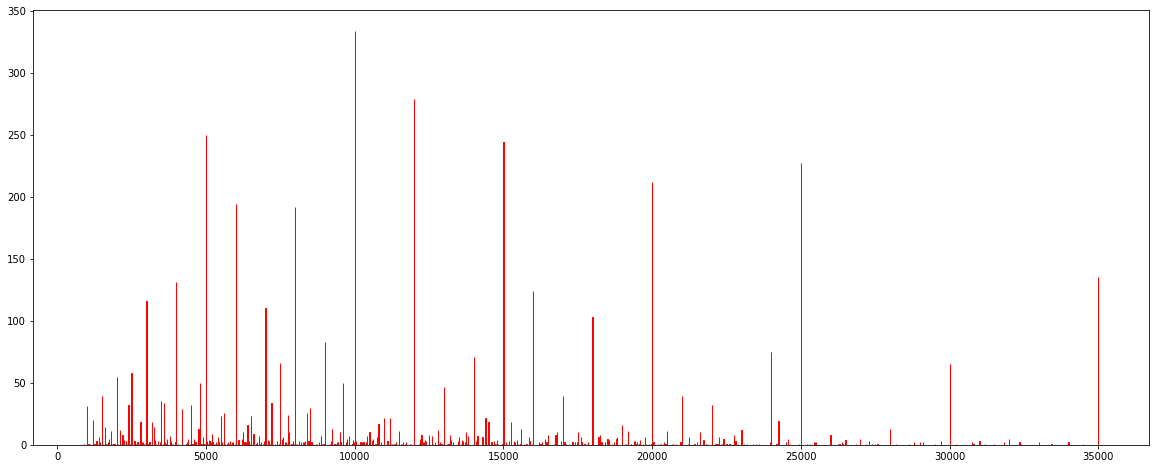

In [36]:
## Ploting the histogram for the loan_amount who are defaulters

binwidth = 7
plt.figure(figsize=[20,8])
plt.hist(df_data_defaulters.loan_amnt, bins=range(min(df_data_defaulters.loan_amnt), max(df_data_defaulters.loan_amnt) + binwidth, binwidth),
         edgecolor="red", color="blue")
plt.show()

#### Checking against Rent and Mortgage(Home_ownership)

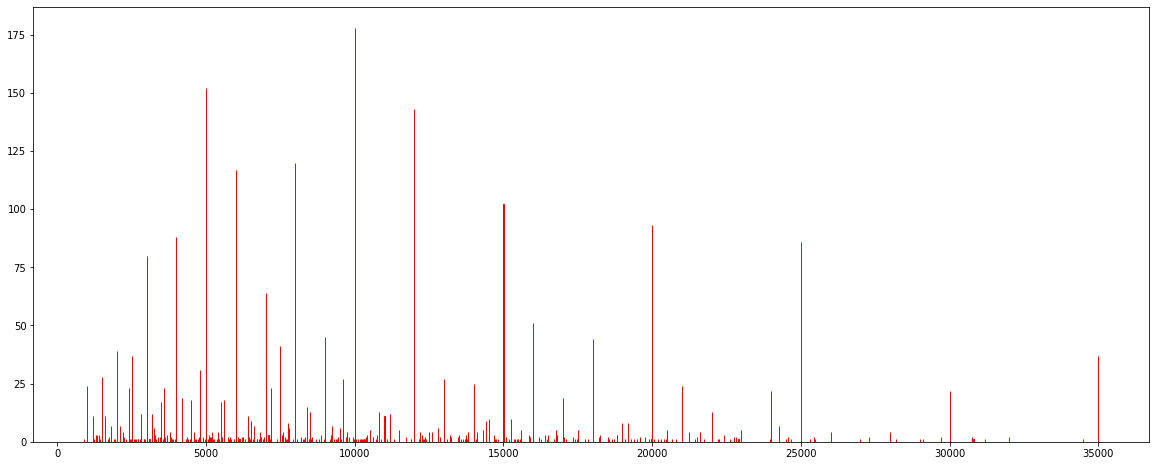

In [37]:
# Ploting histogram for rented defaulters
df_data_rent = df_data_defaulters[df_data_defaulters['home_ownership'] == 'RENT']
plt.figure(figsize=[20,8])
plt.hist(df_data_rent.loan_amnt, bins=range(min(df_data_rent.loan_amnt), max(df_data_rent.loan_amnt) + binwidth),edgecolor="red", color="blue")
plt.show()

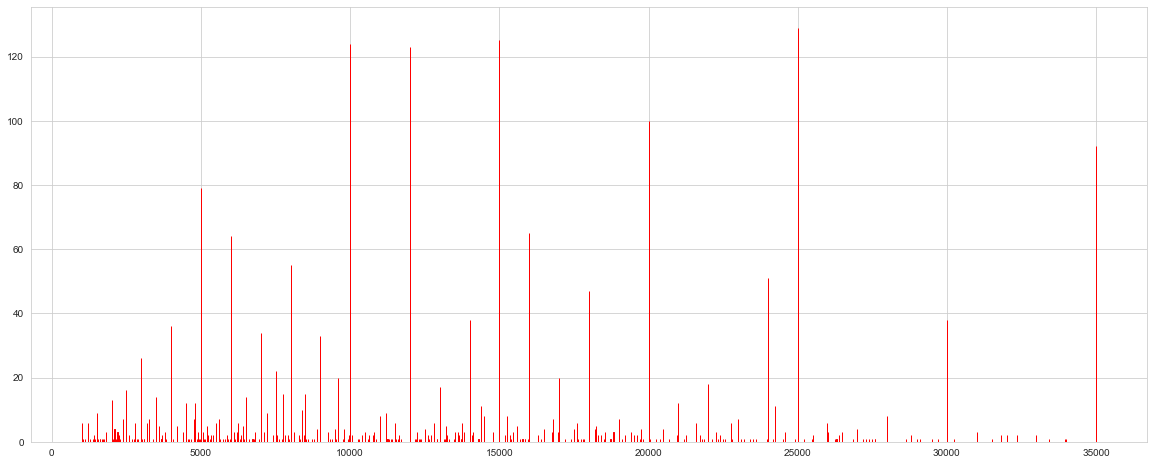

In [75]:
df_data_mtg = df_data_defaulters[df_data_defaulters['home_ownership'] == 'MORTGAGE']
# Ploting histogram for mortgage defaulters
plt.figure(figsize=[20,8])
plt.hist(df_data_mtg.loan_amnt, bins=range(min(df_data_mtg.loan_amnt), max(df_data_mtg.loan_amnt) + binwidth),edgecolor="red", color="blue")
plt.show()

### Observation
* Defaulter applicants count are high in the range of loan amount = 5000 to 13000 under RENT category
* Defaulter applicants count are high in the range of loan amount = 10000 to 25000 under MORTGAGE category

#### Checking against purpose

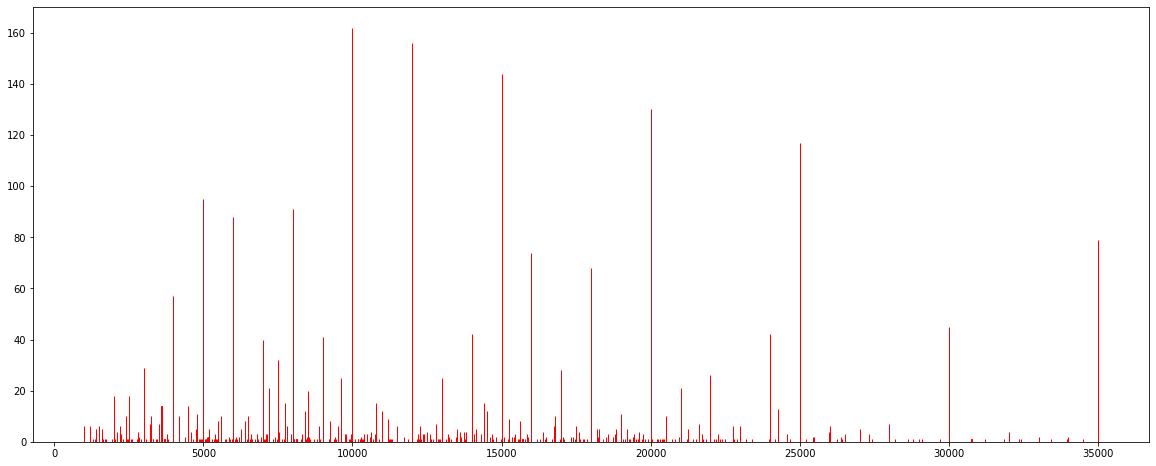

In [39]:
# Ploting histogram for debt_consolidation defaulters
df_data_debt = df_data_defaulters[df_data_defaulters['purpose'] == 'debt_consolidation']
plt.figure(figsize=[20,8])
plt.hist(df_data_debt.loan_amnt, bins=range(min(df_data_debt.loan_amnt), max(df_data_debt.loan_amnt) + binwidth),edgecolor="red", color="blue")
plt.show()

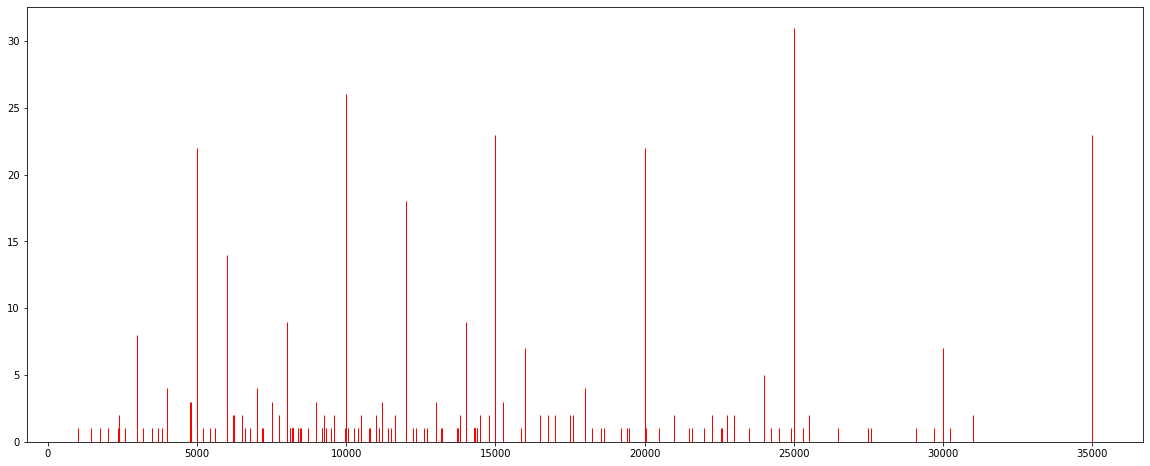

In [40]:
# Ploting histogram for small business defaulters
df_data_smallb = df_data_defaulters[df_data_defaulters['purpose'] == 'small_business']
plt.figure(figsize=[20,8])
plt.hist(df_data_smallb.loan_amnt, bins=range(min(df_data_smallb.loan_amnt), max(df_data_smallb.loan_amnt) + binwidth),edgecolor="red", color="blue")
plt.show()

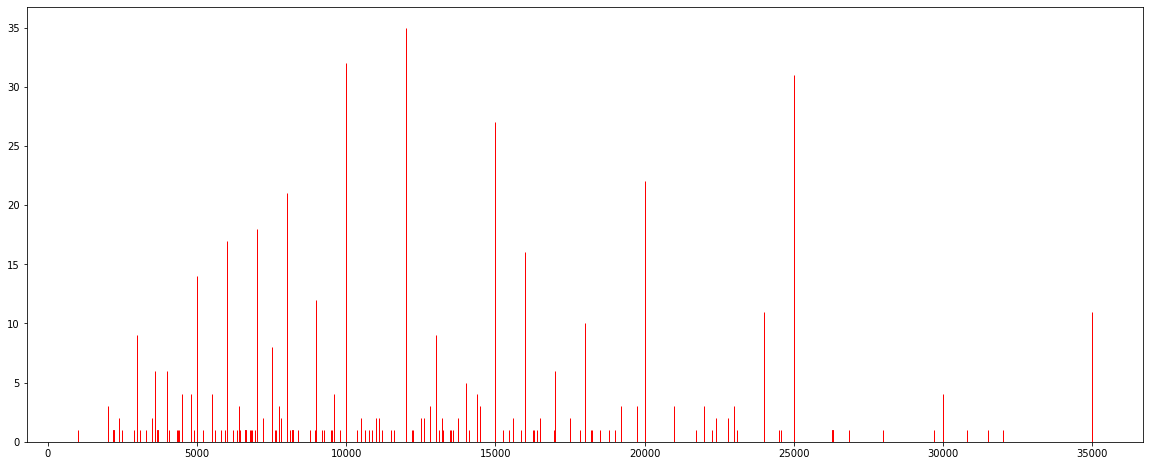

In [41]:
# Ploting histogram for credit card defaulters
df_data_credit = df_data_defaulters[df_data_defaulters['purpose'] == 'credit_card']
plt.figure(figsize=[20,8])
plt.hist(df_data_credit.loan_amnt, bins=range(min(df_data_credit.loan_amnt), max(df_data_credit.loan_amnt) + binwidth),edgecolor="red", color="blue")
plt.show()

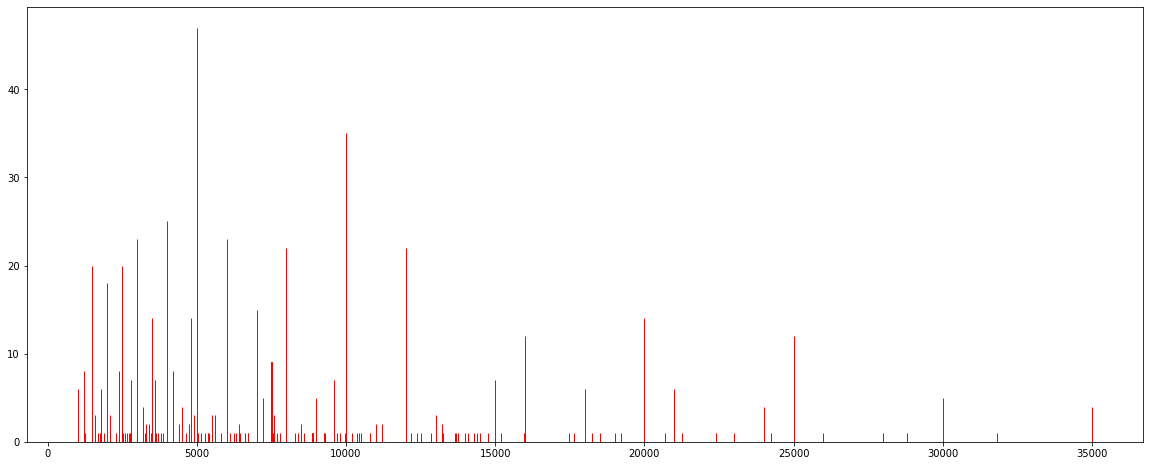

In [42]:
# Ploting histogram for other defaulters
df_data_other = df_data_defaulters[df_data_defaulters['purpose'] == 'other']
plt.figure(figsize=[20,8])
plt.hist(df_data_other.loan_amnt, bins=range(min(df_data_other.loan_amnt), max(df_data_other.loan_amnt) + binwidth),edgecolor="red", color="blue")
plt.show()

### Observation
* Defaulter applicants count are high in the range of loan amount
    * loan_amnt =10000 to 25000 for debt_consolidation
    * loan_amnt =spread across for small_business
    * loan_amnt =10000 to 25000 for credit_card
    * loan_amnt =0 to 10000 for others

### Checking Loan status against Issue_d

In [43]:
#First plot
tr0 = go.Bar(
    x = df_data[df_data["loan_status"]== 'Fully Paid']["issue_d_year"].value_counts().index.values,
    y = df_data[df_data["loan_status"]== 'Fully Paid']["issue_d_year"].value_counts().values,
    name='Good Borrowers'
)

#Second plot
tr1 = go.Bar(
    x = df_data[df_data["loan_status"]== 'Charged Off']["issue_d_year"].value_counts().index.values,
    y = df_data[df_data["loan_status"]== 'Charged Off']["issue_d_year"].value_counts().values,
    name="Defaulted Borrowers"
)

data = [tr0, tr1]

layout = go.Layout(
     yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='issue_d_year'
    ),
    title='issue_d_year & Loan Status Distribuition'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='issue_d_year-Grouped')

In [44]:
#First plot
tr0 = go.Bar(
    x = df_data[df_data["loan_status"]== 'Fully Paid']["issue_d_month"].value_counts().index.values,
    y = df_data[df_data["loan_status"]== 'Fully Paid']["issue_d_month"].value_counts().values,
    name='Good Borrowers'
)

#Second plot
tr1 = go.Bar(
    x = df_data[df_data["loan_status"]== 'Charged Off']["issue_d_month"].value_counts().index.values,
    y = df_data[df_data["loan_status"]== 'Charged Off']["issue_d_month"].value_counts().values,
    name="Defaulted Borrowers"
)

data = [tr0, tr1]

layout = go.Layout(
     yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='issue_d_month'
    ),
    title='issue_d_month & Loan Status Distribuition'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='issue_d_month-Grouped')

### Observation
* There is an increase incoming application for the loan YoY
* The count of loan funded to the applicants is greater in last month of every year than other other months
* The defaulter rate is approx 11-15% throughout the year.

### Recommendation
* Lenidng club to be more cautious while funding money during the year ends.

### Checking Loan status against term

In [45]:
#First plot
tr0 = go.Bar(
    x = df_data[df_data["loan_status"]== 'Fully Paid']["term"].value_counts().index.values,
    y = df_data[df_data["loan_status"]== 'Fully Paid']["term"].value_counts().values,
    name='Good Borrowers'
)

#Second plot
tr1 = go.Bar(
    x = df_data[df_data["loan_status"]== 'Charged Off']["term"].value_counts().index.values,
    y = df_data[df_data["loan_status"]== 'Charged Off']["term"].value_counts().values,
    name="Defaulted Borrowers"
)

data = [tr0, tr1]

layout = go.Layout(
     yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='term'
    ),
    title='term & Loan Status Distribuition'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='term-Grouped')

### Observation
* Many applicantions are for 36 month term
* We see that only ~10% of the total applicants under 36 month tenure fall under the defaulter category.
* However close to 25% of the total number of borrowers who requested 60 month tenure are defaulters.


### Checking the tenure (36 and 60months) against different variables:
#### against Loan Amount

In [46]:
df_data['loan_amnt'].describe()

count    36136.000000
mean     11102.801915
std       7312.947963
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

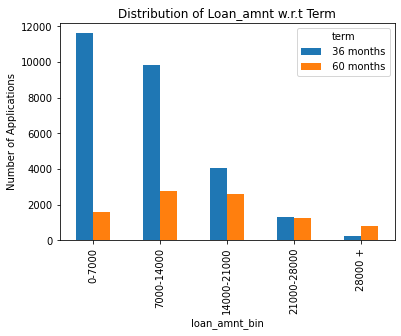

In [47]:
df_data['loan_amnt_bin'] = pd.cut(df_data['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])
df_data.groupby('loan_amnt_bin')['term'].value_counts().unstack().plot(kind='bar', ylabel ='Number of Applications', title ='Distribution of Loan_amnt w.r.t Term')
plt.show()

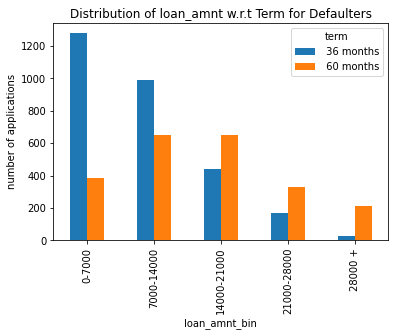

In [48]:
#Now lets subset the above to display only the default borrowers
df_data_defaulters['loan_amnt_bin'] = pd.cut(df_data['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])
df_data_defaulters.groupby('loan_amnt_bin')['term'].value_counts().unstack().plot(kind='bar',ylabel ='number of applications',title ='Distribution of loan_amnt w.r.t Term for Defaulters')
plt.show()

### Observation
* The applicants who request for loan amonts ranging between 14000 to 28000 with 60 month term tend to default more than the 36month tenure.
* Similarly, borrowers who request for loan amounts between 0 and 14000 with 36 months tenure tend to default more.
* Number of loans are more for small loan amounts under 36 month term and is between 7000 and 21000 for 60 month.

#### Against Funded amnt

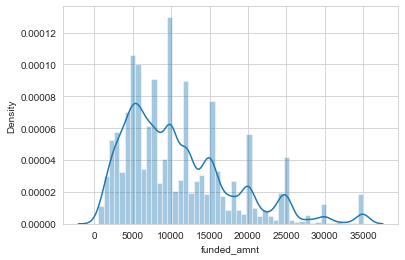

In [49]:
sns.set_style('whitegrid')
sns.distplot(df_data['funded_amnt'])
plt.show()

In [50]:
df_data.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
1  1077430       2500         2500           2500.0   60 months     15.27   
3  1076863      10000        10000          10000.0   36 months     13.49   
5  1075269       5000         5000           5000.0   36 months      7.90   
6  1069639       7000         7000           7000.0   60 months     15.96   
7  1072053       3000         3000           3000.0   36 months     18.64   

   installment grade sub_grade                  emp_title  ...  \
1        59.83     C        C4                      Ryder  ...   
3       339.31     C        C1        AIR RESOURCES BOARD  ...   
5       156.46     A        A4       Veolia Transportaton  ...   
6       170.08     C        C5  Southern Star Photography  ...   
7       109.43     E        E1            MKC Accounting   ...   

  verification_status    issue_d  loan_status             purpose addr_state  \
1     Source Verified 2011-12-01  Charged Off                 car         GA   
3     Source Verified 2011-12-01   Fully Paid               other         CA   
5     Source Verified 2011-12-01   Fully Paid             wedding         AZ   
6        Not Verified 2011-12-01   Fully Paid  debt_consolidation         NC   
7     Source Verified 2011-12-01   Fully Paid                 car         CA   

     dti inq_last_6mths issue_d_year  issue_d_month  loan_amnt_bin  
1   1.00              5         2011             12         0-7000  
3  20.00              1         2011             12     7000-14000  
5  11.20              3         2011             12         0-7000  
6  23.51              1         2011             12         0-7000  
7   5.35              2         2011             12         0-7000  

[5 rows x 23 columns]

In [51]:
df_data.shape

(36136, 23)

#### Against Annual Income

In [52]:
df_data['annual_inc'].describe()

count    3.613600e+04
mean     6.903275e+04
std      6.462191e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

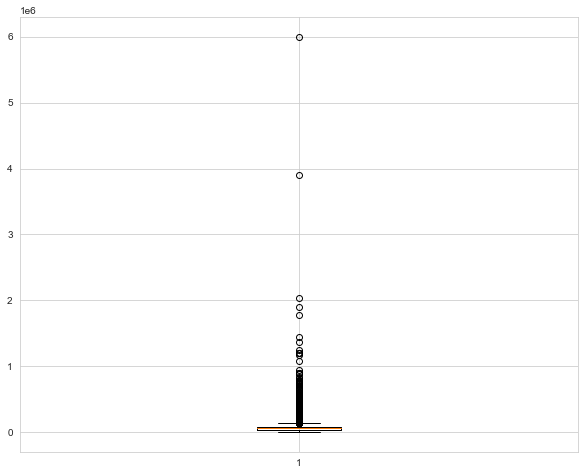

In [53]:
#checking for outliers, and removing them:
plt.figure(figsize=[10,8])
plt.boxplot(df_data.annual_inc)
plt.show()

In [54]:
np.percentile(df_data.annual_inc, 95)

140000.0

In [55]:
df_data = df_data[df_data.annual_inc <= 140000.0]
df_data.shape

(34384, 23)

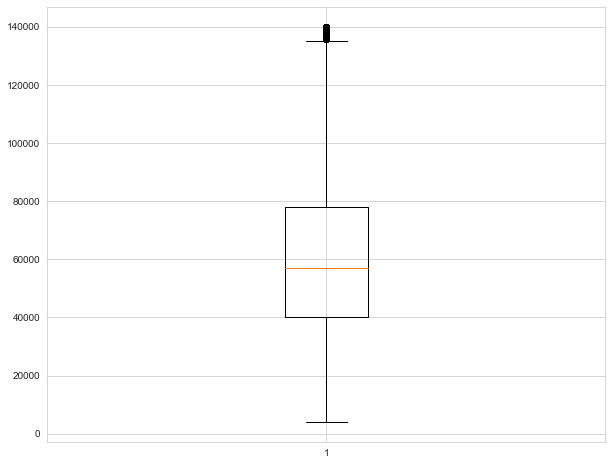

In [56]:
plt.figure(figsize=[10,8])
plt.boxplot(df_data.annual_inc)
plt.show()

<AxesSubplot:title={'center':'Distribution of Annual_inc w.r.t Term'}, xlabel='annual_inc_bin', ylabel='number of applications'>

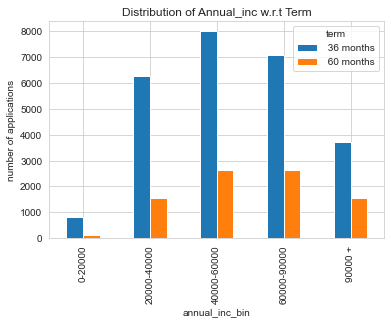

In [57]:
df_data['annual_inc_bin'] = pd.cut(df_data['annual_inc'], [0, 20000, 40000, 60000, 90000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-90000', '90000 +'])
df_data.groupby('annual_inc_bin')['term'].value_counts().unstack().plot(kind='bar', ylabel ='number of applications',title ='Distribution of Annual_inc w.r.t Term')

<AxesSubplot:title={'center':'Distribution of Annual_inc w.r.t Loan status'}, xlabel='annual_inc_bin', ylabel='number of applications'>

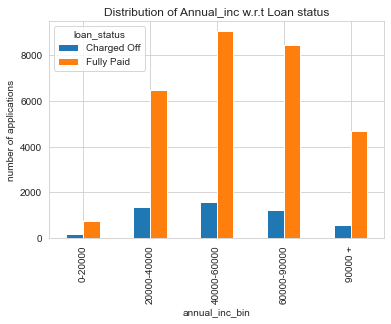

In [58]:
df_data.groupby('annual_inc_bin')['loan_status'].value_counts().unstack().plot(kind='bar',ylabel ='number of applications',title ='Distribution of Annual_inc w.r.t Loan status')

### Observation
* We receive more number of applications having annual income between 40000 and 90000.
* People having annual incomes in ranges, 20000-40000, 40000-60000, 60000-90000 tend to default although the incomes are moderately high.

### Recommendation
* Lending club to be cautious when applicants request for 60 months plan with 
    * Loan amnts ranging between 14000 and 28000 
    * Annual incomes in ranges 40000-60000, 60000-90000
* Lending club to be cautious when applicants request for 36 months plan with 
    * Loan amnts ranging between 0 and 14000
    * Annual incomes in ranges 40000-60000

In [59]:
df_data.shape

(34384, 24)

In [60]:
df_data.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
1  1077430       2500         2500           2500.0   60 months     15.27   
3  1076863      10000        10000          10000.0   36 months     13.49   
5  1075269       5000         5000           5000.0   36 months      7.90   
6  1069639       7000         7000           7000.0   60 months     15.96   
7  1072053       3000         3000           3000.0   36 months     18.64   

   installment grade sub_grade                  emp_title  ...    issue_d  \
1        59.83     C        C4                      Ryder  ... 2011-12-01   
3       339.31     C        C1        AIR RESOURCES BOARD  ... 2011-12-01   
5       156.46     A        A4       Veolia Transportaton  ... 2011-12-01   
6       170.08     C        C5  Southern Star Photography  ... 2011-12-01   
7       109.43     E        E1            MKC Accounting   ... 2011-12-01   

   loan_status             purpose addr_state    dti inq_last_6mths  \
1  Charged Off                 car         GA   1.00              5   
3   Fully Paid               other         CA  20.00              1   
5   Fully Paid             wedding         AZ  11.20              3   
6   Fully Paid  debt_consolidation         NC  23.51              1   
7   Fully Paid                 car         CA   5.35              2   

  issue_d_year issue_d_month  loan_amnt_bin  annual_inc_bin  
1         2011            12         0-7000     20000-40000  
3         2011            12     7000-14000     40000-60000  
5         2011            12         0-7000     20000-40000  
6         2011            12         0-7000     40000-60000  
7         2011            12         0-7000     40000-60000  

[5 rows x 24 columns]

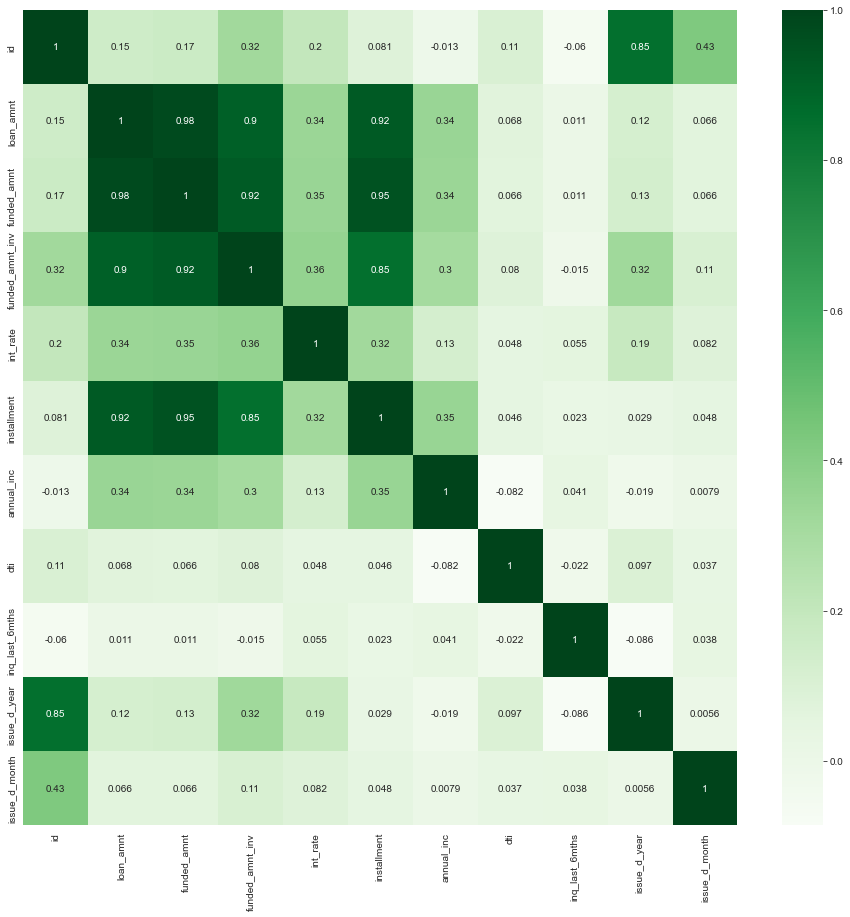

In [61]:
plt.figure(figsize=(16, 15))
sns.heatmap(df_data_defaulters.corr(), cmap="Greens", annot=True)
plt.show()

### Observation
* There is high correlation between loan_amnt, funded_amnt and funded_amnt_inv
* We also notice an inverse correlation between dti and annual income, this relationship will help us determine if the applicant is capable of paying the loan and manage existing debts.
* We can infere the following from the heat map: lower the dti indicates higher annual income implying the applicant would pay the loan. On the other hand when the dti is high, it indicates low income which may lead to applicant becoming a defaulter. 
* dti and inq_last_6mnths have negative correlation, indicating that the higher the dti, the lesser inquires and we need to be cautious when we come across such combinations.

### Recommendation
* Applicants with higher dti and low annual incomes tend to default, lending club to be cautious about this parameter.

### The address state with total number borrowers

In [62]:
top_addr_state1 = df_data.groupby(['addr_state'], as_index=False).agg({'id': pd.Series.count})
top_addr_state1.sort_values(by='id', inplace=True)
top_addr_state1 = top_addr_state1[-20:]

In [63]:
h_bar = px.bar(x=top_addr_state1.id, y=top_addr_state1.addr_state, orientation='h', color=top_addr_state1.id, color_continuous_scale='Viridis', title='Top 20 Address State By Number of Total Borrowers')
h_bar.update_layout(xaxis_title='Total number of Applicants', yaxis_title='Address State', coloraxis_showscale=False)
h_bar.show()

### The address state with most number of defaulted borrowers

In [64]:
top_addr_state = df_data_defaulters.groupby(['addr_state'], as_index=False).agg({'id': pd.Series.count})
top_addr_state.sort_values(by='id', inplace=True)
top_addr_state = top_addr_state[-20:]

In [65]:
h_bar = px.bar(x=top_addr_state.id, y=top_addr_state.addr_state, orientation='h', color=top_addr_state.id, color_continuous_scale='Viridis', title='Top 20 Address State By Number of Defaulted Borrowers')
h_bar.update_layout(xaxis_title='Number of Defaulted Applicants', yaxis_title='Address State', coloraxis_showscale=False)
h_bar.show()

### Observation
* The top 3 states having high default rates are CA, NY, FL.
* Also we have high number of loan applications coming from these 3 states.

### Analysis for Defaulted Loans for whom inquiry was made in last 6 months

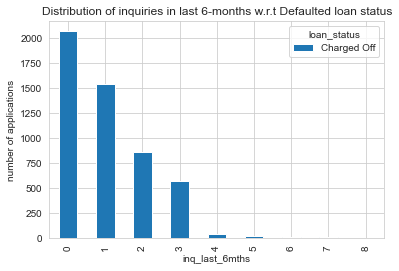

In [66]:
df_data_defaulters.groupby('inq_last_6mths')['loan_status'].value_counts().unstack().plot(kind='bar',ylabel ='number of applications',title ='Distribution of inquiries in last 6-months w.r.t Defaulted loan status')
plt.show()

### Observation
* There is a decreasing trend on the number of defaulters based on the number on inquires, as the inquiries increase the defaulter rate decreases.

### Recommendation
* Lending club should a increase the frequency of inquiries as they play a major role in identifying the defaulters.

### Analysis on Interest Rate with Loan Status & Grade 

In [67]:
df_data['int_rate'].describe()

count    34384.000000
mean        11.924769
std          3.659283
min          5.420000
25%          8.940000
50%         11.720000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

In [68]:
df_data.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
1  1077430       2500         2500           2500.0   60 months     15.27   
3  1076863      10000        10000          10000.0   36 months     13.49   
5  1075269       5000         5000           5000.0   36 months      7.90   
6  1069639       7000         7000           7000.0   60 months     15.96   
7  1072053       3000         3000           3000.0   36 months     18.64   

   installment grade sub_grade                  emp_title  ...    issue_d  \
1        59.83     C        C4                      Ryder  ... 2011-12-01   
3       339.31     C        C1        AIR RESOURCES BOARD  ... 2011-12-01   
5       156.46     A        A4       Veolia Transportaton  ... 2011-12-01   
6       170.08     C        C5  Southern Star Photography  ... 2011-12-01   
7       109.43     E        E1            MKC Accounting   ... 2011-12-01   

   loan_status             purpose addr_state    dti inq_last_6mths  \
1  Charged Off                 car         GA   1.00              5   
3   Fully Paid               other         CA  20.00              1   
5   Fully Paid             wedding         AZ  11.20              3   
6   Fully Paid  debt_consolidation         NC  23.51              1   
7   Fully Paid                 car         CA   5.35              2   

  issue_d_year issue_d_month  loan_amnt_bin  annual_inc_bin  
1         2011            12         0-7000     20000-40000  
3         2011            12     7000-14000     40000-60000  
5         2011            12         0-7000     20000-40000  
6         2011            12         0-7000     40000-60000  
7         2011            12         0-7000     40000-60000  

[5 rows x 24 columns]

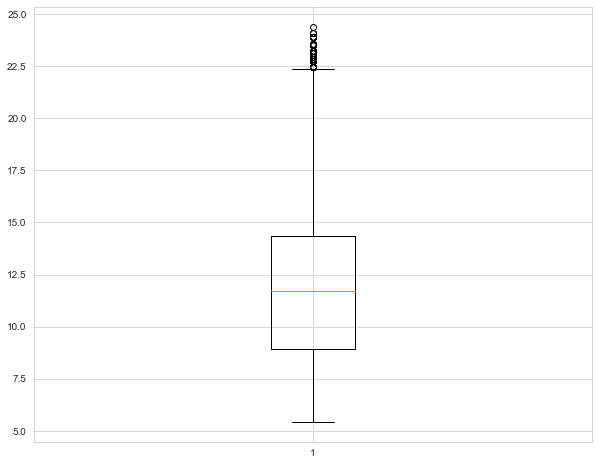

In [69]:
plt.figure(figsize=[10,8])
plt.boxplot(df_data.int_rate)
plt.show()

In [70]:
pd.cut(df_data.int_rate, 5).value_counts()
df_data['int_rate_bin'] = pd.cut(df_data.int_rate,5)
df_data['int_rate_bin']

1        (13.012, 16.808]
3        (13.012, 16.808]
5          (5.401, 9.216]
6        (13.012, 16.808]
7        (16.808, 20.604]
               ...       
39710      (5.401, 9.216]
39711      (5.401, 9.216]
39712      (5.401, 9.216]
39713     (9.216, 13.012]
39716    (13.012, 16.808]
Name: int_rate_bin, Length: 34384, dtype: category
Categories (5, interval[float64]): [(5.401, 9.216] < (9.216, 13.012] < (13.012, 16.808] < (16.808, 20.604] < (20.604, 24.4]]

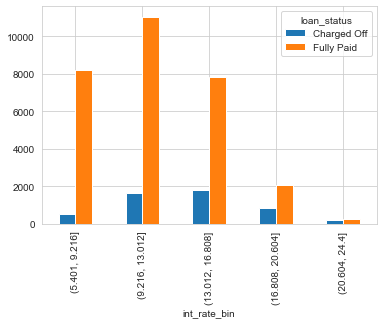

In [71]:
df_data.groupby('int_rate_bin')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.show()

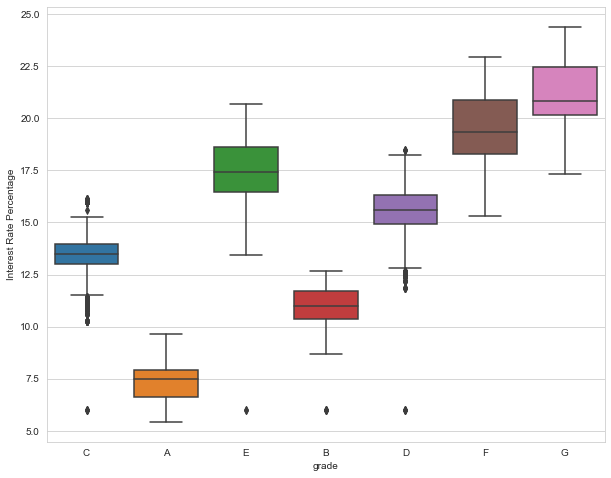

In [72]:
plt.figure(figsize=(10,8))
sns.boxplot(y='int_rate', x='grade', data=df_data)
plt.ylabel('Interest Rate Percentage')
plt.show()

### Observation
* Default rates are high for int_rates ranging between 9 and 16(approx.,)
* Higher grades have lower interest rate <12% (approximately)

### Recommendation
* Lending club should evaluate that higher interest rate have higher tendency to default the loan.

### Checking the relation between Grade and Loan Amount

In [73]:
df_data_grade = df_data.groupby(['grade'], as_index=False).agg({'loan_amnt': pd.Series.sum})
df_data_grade.sort_values(by='loan_amnt', inplace=True, ascending=False)

In [74]:
h_bar = px.bar(x=df_data_grade.grade, y=df_data_grade.loan_amnt, orientation='v', color=df_data_grade.loan_amnt, color_continuous_scale='Viridis', title='Loan Amount vs Grade')
h_bar.update_layout(xaxis_title='Grade', yaxis_title='Sum of Loan Amount', coloraxis_showscale=False)
h_bar.show()

### Observation
* Grades A and B have the highest loan application requests.
* Higher loan amounts were requested with high quality loans. [grades A and B]

## Conclusion

### Recommendations
#### Driving factors that lending club needs to be more cautious when funding loans:
* Close to 15% of the total applicants are defaulters.
* Below factors play a major role in identifying defaulters:

* <b>Purpose</b>
    * Debt consolidation has the highest number of loans granted.
    * Small business has the highest number of defaulter ratio.
    * Defaulter applicants count are high for loan amount:
        * 10000 to 25000 under debt_consolidation
        * spread across for small_business
* <b>Home ownership</b>
    * Rented and Mortgage have highest number of defaulters.
    * Default rates are high for loan amount = 5000 to 13000 under RENT category
    * Default rates are high for loan amount = 10000 to 25000 under MORTGAGE category
* <b>Employment length</b>
    * Employees with 10+years of experience tend to default more.
* <b>Verification Status</b>
    * There is a huge number of applicants whose annual incomes are not verified, this needs to be completed to understand the trends with more clarity.
* <b>DTI and Annual income</b>
    * Applicants with higher dti and low annual incomes tend to default.
* <b>DTI and Inquiry in last 6 months
    * Less number of inquires indicate more dti rates which further indicate less annual incomes, implying the borrower to be a defaulter.
* <b>Term</b>
    * More number of loans were requested for 36 month tenure.
    * Borrowers who request for loan amounts between 0 and 14000 with 36 months tenure tend to default more.
    * Borrowers having annual incomes in ranges, 20000-40000, 40000-60000, 60000-90000 tend to default more.
* <b>Address States</b>
    * applicants from CA tend to default more compared to other states.
* <b>Grades and Interest Rates</b>
    * High quality loans[grades A and B] have high loan applicantion requests.
    * Higher interest rate have higher tendency to default the loan.

